##Class Activation Map

used data : MNIST(28*28 Matrix = 784 pixel)

In [22]:
#import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import scipy

In [23]:
#load data & nomalize data
def load_mnist_dataset():
    (train_validation_images, train_validation_labels), (test_images, test_labels) = mnist.load_data()

    train_validation_images = train_validation_images.reshape(-1,28,28,1)
    test_images = test_images.reshape(-1,28,28,1)

    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.

    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)

    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels

#train set
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
#validtion set
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
#train&validation set
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)

    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [24]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

11490434/11490434 [==============================] - 0s 0us/step
Image : (48000, 28, 28, 1)
Label : (48000,)
Image : (12000, 28, 28, 1)
Label : (12000,)
Image : (10000, 28, 28, 1)
Label : (10000,)


In [25]:
#build CNN model
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(GlobalAveragePooling2D())#flatten 대신 사용
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [26]:
#train model
history = model.fit(train_x, train_y, batch_size=9, epochs=10,\
                    verbose=2, validation_data=(validation_x, validation_y))

Epoch 1/10
5334/5334 - 64s - loss: 1.0744 - accuracy: 0.6519 - val_loss: 0.5522 - val_accuracy: 0.8416 - 64s/epoch - 12ms/step
Epoch 2/10
5334/5334 - 63s - loss: 0.4571 - accuracy: 0.8644 - val_loss: 0.3743 - val_accuracy: 0.8828 - 63s/epoch - 12ms/step
Epoch 3/10
5334/5334 - 62s - loss: 0.3373 - accuracy: 0.8986 - val_loss: 0.3575 - val_accuracy: 0.8827 - 62s/epoch - 12ms/step
Epoch 4/10
5334/5334 - 62s - loss: 0.2822 - accuracy: 0.9150 - val_loss: 0.2570 - val_accuracy: 0.9199 - 62s/epoch - 12ms/step
Epoch 5/10
5334/5334 - 66s - loss: 0.2439 - accuracy: 0.9271 - val_loss: 0.2273 - val_accuracy: 0.9306 - 66s/epoch - 12ms/step
Epoch 6/10
5334/5334 - 62s - loss: 0.2200 - accuracy: 0.9324 - val_loss: 0.1761 - val_accuracy: 0.9476 - 62s/epoch - 12ms/step
Epoch 7/10
5334/5334 - 61s - loss: 0.1967 - accuracy: 0.9408 - val_loss: 0.1850 - val_accuracy: 0.9448 - 61s/epoch - 11ms/step
Epoch 8/10
5334/5334 - 63s - loss: 0.1803 - accuracy: 0.9455 - val_loss: 0.1926 - val_accuracy: 0.9414 - 63s/ep

In [27]:
#test model
result= model.evaluate(test_x, test_y, verbose=2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

313/313 - 3s - loss: 0.1291 - accuracy: 0.9604 - 3s/epoch - 9ms/step
Test loss : 0.1291	 Test accuracy : 96.04%


313/313 [==============================] - 3s 10ms/step
Probabilty is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


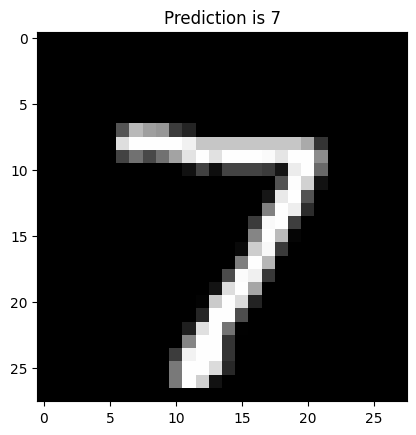

In [28]:
prediction = model.predict(test_x)
plt.imshow(test_x[0], 'gray')
print('Probabilty is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[0])))
plt.show()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 36)               0         
 lobalAveragePooling2D)                                          
                                                        

In [30]:
#Construct CAM model
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 36)               0     

In [31]:
features,results = cam_model.predict(test_x)
print("features shape: ", features.shape)
print("results shape", results.shape)

313/313 [==============================] - 4s 14ms/step
features shape:  (10000, 7, 7, 36)
results shape (10000, 10)


In [32]:
last_dense_layer = model.layers[-1]
gap_weights = last_dense_layer.get_weights()[0]
print(gap_weights.shape)

(36, 10)


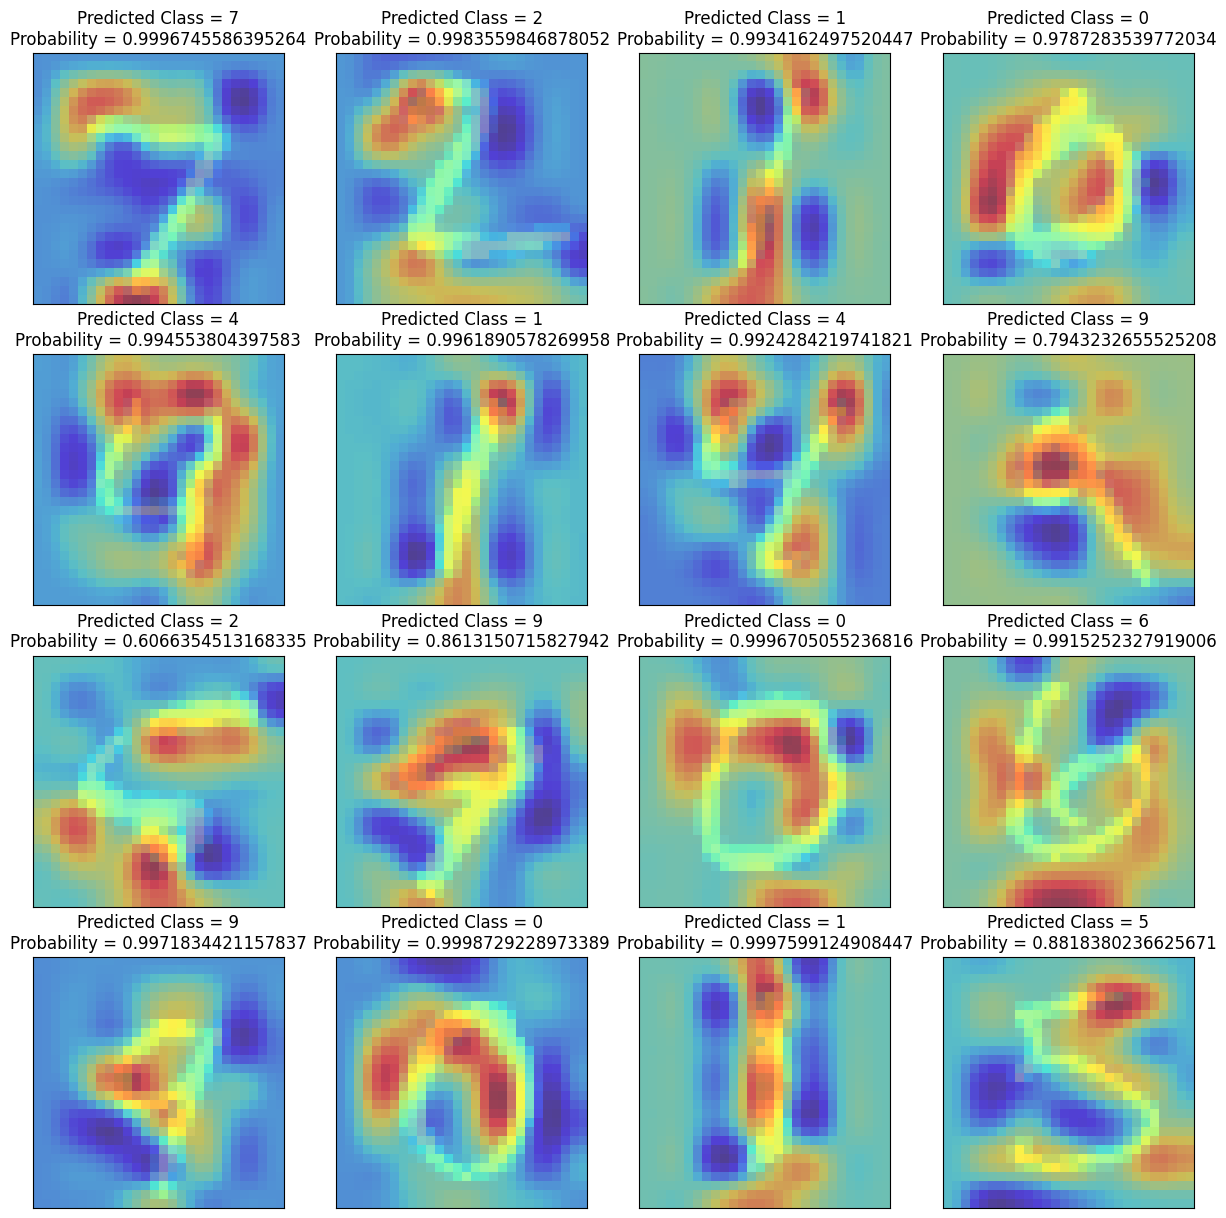

In [33]:
#result
fig, axes = plt.subplots(4, 4, figsize=(15,15))

for ax_idx, ax in enumerate(axes.flat):

    features_for_img = features[ax_idx,:,:,:]
    prediction = np.argmax(results[ax_idx])
    class_activation_weights =\
    gap_weights[:,prediction]
    class_activation_features =\
    scipy.ndimage.zoom(features_for_img, (28/7, 28/7, 1), order=2)
    cam_output  = np.dot(class_activation_features,
                         class_activation_weights)
    ax.set_title('Predicted Class = {}\nProbability = {}'.\
                 format(prediction, results[ax_idx, prediction]))
    ax.imshow(np.squeeze(test_x[ax_idx],-1), alpha=0.5)
    ax.imshow(cam_output, alpha=0.5, cmap=plt.cm.jet)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)